# EDA (Varun's)
The goal of this notebook is to investigate the data. We can answer the following questions

0. Load data and imports
1. Define key metrics
2. perform eda
3. what data is available
4. visualize the data

# 0. Load data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()


'/home/denny/Documents/mids/ev_charging/eda'

In [2]:
# os.chdir('/Users/varunvenkatesh/Documents/Github/ev_charging/')
os.chdir('..')

In [3]:
# get dataframes by reading all parquet files in a directory
# https://stackoverflow.com/a/66104513
df_ct = pd.read_parquet('data/ACN-API/caltech/')#'data/sessions/caltech/')
df_jpl = pd.read_parquet('data/ACN-API/jpl/')#'data/sessions/jpl/')
df_of = pd.read_parquet('data/ACN-API/office001/')#'data/sessions/office001/')
print(f"Caltech Shape: {df_ct.shape}\nJPL Shape: {df_jpl.shape}\nOffice Shape: {df_of.shape}")

Caltech Shape: (31125, 12)
JPL Shape: (33587, 12)
Office Shape: (1681, 12)


In [4]:
df_ct.reset_index(drop=True, inplace=True)
df_ct.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID
0,5bc9160af9af8b0dad3c0690,None,2_39_95_27_2018-05-01 13:23:18.374684,2-39-95-27,CA-319,2,39,2018-05-01 06:23:18-07:00,2018-05-01 18:53:41-07:00,13.410,2018-05-01 10:17:07-07:00,None
1,5bc9160af9af8b0dad3c0691,None,2_39_79_380_2018-05-01 13:54:33.599590,2-39-79-380,CA-489,2,39,2018-05-01 06:54:34-07:00,2018-05-01 16:15:35-07:00,8.618,2018-05-01 08:35:39-07:00,None
2,5bc9160af9af8b0dad3c0692,None,2_39_139_28_2018-05-01 14:46:04.441389,2-39-139-28,CA-303,2,39,2018-05-01 07:46:04-07:00,2018-05-01 17:54:07-07:00,13.969,2018-05-01 16:57:02-07:00,None
3,5bc9160af9af8b0dad3c0693,None,2_39_79_378_2018-05-01 14:56:28.908623,2-39-79-378,CA-326,2,39,2018-05-01 07:56:29-07:00,2018-05-01 14:52:45-07:00,6.914,2018-05-01 09:07:56-07:00,None
4,5bc9160af9af8b0dad3c0694,None,2_39_88_24_2018-05-01 15:14:50.443137,2-39-88-24,CA-314,2,39,2018-05-01 08:14:50-07:00,2018-05-01 15:51:30-07:00,13.785,2018-05-01 13:18:12-07:00,None


In [5]:
df_jpl.reset_index(drop=True, inplace=True)
df_jpl.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID
0,5c36621bf9af8b4639a8e0b4,None,1_1_179_800_2018-09-05 11:04:12.876087,1-1-179-800,AG-3F32,1,1,2018-09-05 04:04:13-07:00,2018-09-05 12:09:35-07:00,9.583,None,None
1,5c36621bf9af8b4639a8e0b5,"[{'userID': 333, 'milesRequested': 20, 'WhPerM...",1_1_179_794_2018-09-05 11:08:08.945820,1-1-179-794,AG-3F20,1,1,2018-09-05 04:08:09-07:00,2018-09-05 07:09:02-07:00,7.114,None,000000333
2,5c36621bf9af8b4639a8e0b6,"[{'userID': 371, 'milesRequested': 20, 'WhPerM...",1_1_179_797_2018-09-05 12:35:14.070250,1-1-179-797,AG-3F23,1,1,2018-09-05 05:35:14-07:00,2018-09-05 17:30:12-07:00,11.774,None,000000371
3,5c36621bf9af8b4639a8e0b7,"[{'userID': 405, 'milesRequested': 20, 'WhPerM...",1_1_179_781_2018-09-05 12:51:31.050539,1-1-179-781,AG-3F31,1,1,2018-09-05 05:51:31-07:00,2018-09-05 15:32:58-07:00,6.280,None,000000405
4,5c36621bf9af8b4639a8e0b8,"[{'userID': 368, 'milesRequested': 20, 'WhPerM...",1_1_179_787_2018-09-05 13:08:27.901538,1-1-179-787,AG-3F16,1,1,2018-09-05 06:08:28-07:00,2018-09-05 16:32:52-07:00,7.022,None,000000368


In [6]:
df_of.reset_index(drop=True, inplace=True)
df_of.head()

,_id,userInputs,userID,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime
0,5cd1d47af9af8b68f0e96713,None,None,19_102_260_1633_2019-03-25 16:24:42.408146,19-102-260-1633,02,19,102,2019-03-25 09:24:42-07:00,2019-03-25 18:32:12-07:00,6.146,2019-03-25 10:32:48-07:00
1,5cd1d47af9af8b68f0e96714,None,None,19_102_260_1634_2019-03-25 17:19:26.896309,19-102-260-1634,03,19,102,2019-03-25 10:19:27-07:00,2019-03-25 17:38:50-07:00,3.658,2019-03-25 11:00:49-07:00
2,5cd1d47af9af8b68f0e96715,None,None,19_102_260_1640_2019-03-25 21:27:32.338192,19-102-260-1640,08,19,102,2019-03-25 14:27:32-07:00,2019-03-25 20:32:03-07:00,28.330,2019-03-25 19:10:40-07:00
3,5cd1d47df9af8b68f0e96716,None,None,19_102_260_1640_2019-03-26 18:33:56.204855,19-102-260-1640,08,19,102,2019-03-26 11:33:56-07:00,2019-03-26 17:45:33-07:00,12.978,2019-03-26 15:30:58-07:00
4,5cd1d47ef9af8b68f0e96717,None,None,19_102_260_1640_2019-03-27 18:28:00.642220,19-102-260-1640,08,19,102,2019-03-27 11:28:01-07:00,2019-03-27 17:37:47-07:00,10.688,2019-03-27 14:44:03-07:00


In [7]:
print(f"site ID for caltech: {df_ct['siteID'].unique()}")
print(f"site ID for jpl: {df_jpl['siteID'].unique()}")
print(f"site ID for office: {df_of['siteID'].unique()}")

site ID for caltech: [2]
site ID for jpl: [1]
site ID for office: [19]


# Convert User Inputs
process taken from here:

https://stackoverflow.com/a/41970572

In [8]:
def convert_userInputs(x):
    """could do try except block instead"""
    # x is a string of a list of dictionaries, like this
    # '[{'userID': 333, 'milesRequested': 20, 'WhPerMile': 400, 'minutesAvailable': 277, 'modifiedAt': 'Wed, 05 Sep 2018 11:08:31 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 05 Sep 2018 15...}]'
    if x:
        x = eval(x) # convert string to list
        x = x[0] # get first and only entry in list (a dictionary)
        return pd.Series(x) # convert dictionary to a series
    else: # x is none
        none_record = {'userID':None, 
                       'milesRequested':None,
                       'WhPerMile':None,
                       'minutesAvailable':None,
                       'modifiedAt':None,
                       'paymentRequired':None,
                       'requestedDeparture':None,
                       'kWhRequested':None
                       }
        return pd.Series(none_record)
    
def userinput_processing(df):
    if 'userInputs' not in df.columns:
        print(f'the column userInputs was not found in the dataframes columns. userinput processing skipped.')
        return df
    assert 'userInputs' in list(df.columns)
    return pd.concat([df.drop(columns='userInputs'), df['userInputs'].apply(convert_userInputs)], axis=1)
    

In [9]:
df_ct = userinput_processing(df_ct)
df_jpl = userinput_processing(df_jpl)
df_of = userinput_processing(df_of)
# df_ct = pd.concat([df_ct.drop(columns='userInputs'), df_ct['userInputs'].apply(convert_userInputs)], axis=1)


# Convert times
Something is off about the time zone, so I made it utc to stop throwing errors. not my best idea but it works for now

In [10]:
def datetime_processing(df):
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['connectionTimeHour'] = df['connectionTime'].dt.hour
    df['connectionTimeDay'] = df['connectionTime'].dt.day
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['disconnectTimeHour'] = df['disconnectTime'].dt.hour
    df['disconnectTimeDay'] = df['disconnectTime'].dt.day
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['doneChargingTimeHour'] = df['doneChargingTime'].dt.hour
    df['doneChargingTimeDay'] = df['doneChargingTime'].dt.day
    return df

In [11]:
df_ct = datetime_processing(df_ct)
df_jpl = datetime_processing(df_jpl)
df_of = datetime_processing(df_of)

/tmp/ipykernel_531857/884169512.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['connectionTime'] = pd.to_datetime(df['connectionTime'], infer_datetime_format=True, utc=True, errors='coerce')
/tmp/ipykernel_531857/884169512.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], infer_datetime_format=True, utc=True, errors='coerce')
/tmp/ipykernel_531857/884169512.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of i

In [12]:
df_ct.head()

,_id,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,...,modifiedAt,paymentRequired,requestedDeparture,kWhRequested,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5bc9160af9af8b0dad3c0690,2_39_95_27_2018-05-01 13:23:18.374684,2-39-95-27,CA-319,2,39,2018-05-01 13:23:18+00:00,2018-05-02 01:53:41+00:00,13.410,2018-05-01 17:17:07+00:00,...,None,None,None,NaN,13,1,1,2,17.0,1.0
1,5bc9160af9af8b0dad3c0691,2_39_79_380_2018-05-01 13:54:33.599590,2-39-79-380,CA-489,2,39,2018-05-01 13:54:34+00:00,2018-05-01 23:15:35+00:00,8.618,2018-05-01 15:35:39+00:00,...,None,None,None,NaN,13,1,23,1,15.0,1.0
2,5bc9160af9af8b0dad3c0692,2_39_139_28_2018-05-01 14:46:04.441389,2-39-139-28,CA-303,2,39,2018-05-01 14:46:04+00:00,2018-05-02 00:54:07+00:00,13.969,2018-05-01 23:57:02+00:00,...,None,None,None,NaN,14,1,0,2,23.0,1.0
3,5bc9160af9af8b0dad3c0693,2_39_79_378_2018-05-01 14:56:28.908623,2-39-79-378,CA-326,2,39,2018-05-01 14:56:29+00:00,2018-05-01 21:52:45+00:00,6.914,2018-05-01 16:07:56+00:00,...,None,None,None,NaN,14,1,21,1,16.0,1.0
4,5bc9160af9af8b0dad3c0694,2_39_88_24_2018-05-01 15:14:50.443137,2-39-88-24,CA-314,2,39,2018-05-01 15:14:50+00:00,2018-05-01 22:51:30+00:00,13.785,2018-05-01 20:18:12+00:00,...,None,None,None,NaN,15,1,22,1,20.0,1.0


In [13]:
df_jpl.head()

,_id,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,...,modifiedAt,paymentRequired,requestedDeparture,kWhRequested,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5c36621bf9af8b4639a8e0b4,1_1_179_800_2018-09-05 11:04:12.876087,1-1-179-800,AG-3F32,1,1,2018-09-05 11:04:13+00:00,2018-09-05 19:09:35+00:00,9.583,NaT,...,None,None,None,NaN,11,5,19,5,NaN,NaN
1,5c36621bf9af8b4639a8e0b5,1_1_179_794_2018-09-05 11:08:08.945820,1-1-179-794,AG-3F20,1,1,2018-09-05 11:08:09+00:00,2018-09-05 14:09:02+00:00,7.114,NaT,...,"Wed, 05 Sep 2018 11:08:31 GMT",True,"Wed, 05 Sep 2018 15:45:09 GMT",8.0,11,5,14,5,NaN,NaN
2,5c36621bf9af8b4639a8e0b6,1_1_179_797_2018-09-05 12:35:14.070250,1-1-179-797,AG-3F23,1,1,2018-09-05 12:35:14+00:00,2018-09-06 00:30:12+00:00,11.774,NaT,...,"Wed, 05 Sep 2018 12:35:16 GMT",True,"Wed, 05 Sep 2018 13:35:14 GMT",8.0,12,5,0,6,NaN,NaN
3,5c36621bf9af8b4639a8e0b7,1_1_179_781_2018-09-05 12:51:31.050539,1-1-179-781,AG-3F31,1,1,2018-09-05 12:51:31+00:00,2018-09-05 22:32:58+00:00,6.280,NaT,...,"Wed, 05 Sep 2018 12:52:29 GMT",True,"Wed, 05 Sep 2018 22:34:31 GMT",12.0,12,5,22,5,NaN,NaN
4,5c36621bf9af8b4639a8e0b8,1_1_179_787_2018-09-05 13:08:27.901538,1-1-179-787,AG-3F16,1,1,2018-09-05 13:08:28+00:00,2018-09-05 23:32:52+00:00,7.022,NaT,...,"Wed, 05 Sep 2018 13:08:48 GMT",True,"Wed, 05 Sep 2018 15:07:28 GMT",8.0,13,5,23,5,NaN,NaN


In [14]:
df_of.head()

,_id,userID,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,...,modifiedAt,paymentRequired,requestedDeparture,kWhRequested,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5cd1d47af9af8b68f0e96713,None,19_102_260_1633_2019-03-25 16:24:42.408146,19-102-260-1633,02,19,102,2019-03-25 16:24:42+00:00,2019-03-26 01:32:12+00:00,6.146,...,None,None,None,NaN,16,25,1,26,17.0,25.0
1,5cd1d47af9af8b68f0e96714,None,19_102_260_1634_2019-03-25 17:19:26.896309,19-102-260-1634,03,19,102,2019-03-25 17:19:27+00:00,2019-03-26 00:38:50+00:00,3.658,...,None,None,None,NaN,17,25,0,26,18.0,25.0
2,5cd1d47af9af8b68f0e96715,None,19_102_260_1640_2019-03-25 21:27:32.338192,19-102-260-1640,08,19,102,2019-03-25 21:27:32+00:00,2019-03-26 03:32:03+00:00,28.330,...,None,None,None,NaN,21,25,3,26,2.0,26.0
3,5cd1d47df9af8b68f0e96716,None,19_102_260_1640_2019-03-26 18:33:56.204855,19-102-260-1640,08,19,102,2019-03-26 18:33:56+00:00,2019-03-27 00:45:33+00:00,12.978,...,None,None,None,NaN,18,26,0,27,22.0,26.0
4,5cd1d47ef9af8b68f0e96717,None,19_102_260_1640_2019-03-27 18:28:00.642220,19-102-260-1640,08,19,102,2019-03-27 18:28:01+00:00,2019-03-28 00:37:47+00:00,10.688,...,None,None,None,NaN,18,27,0,28,21.0,27.0


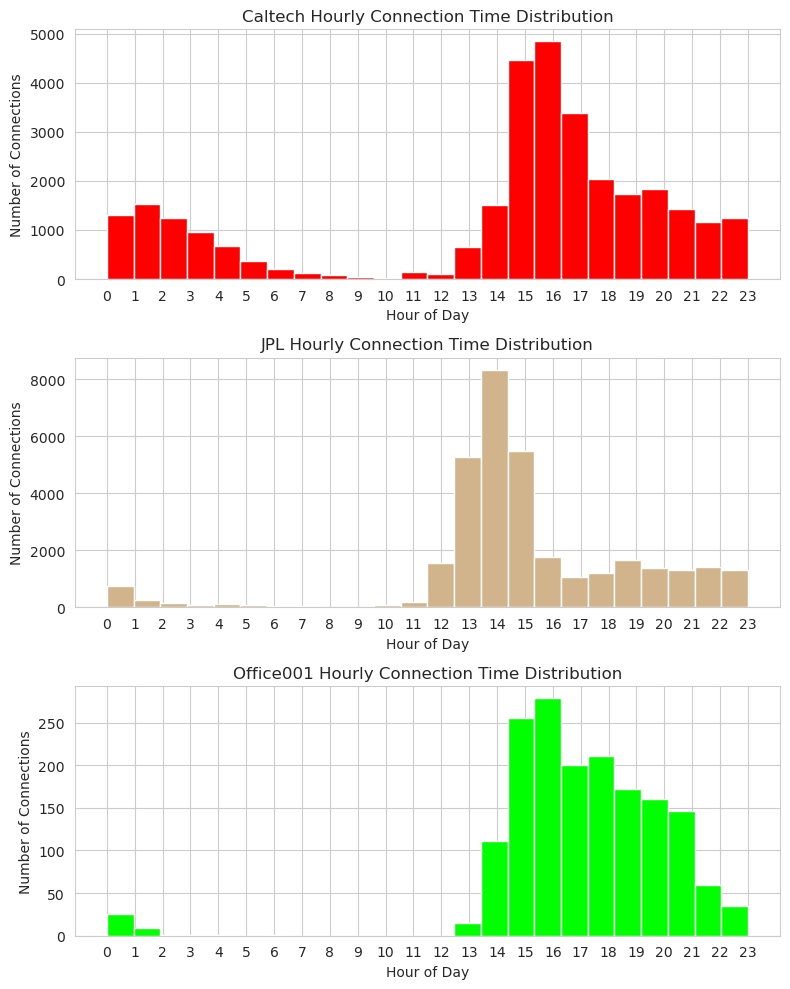

In [15]:
n_bins = 24
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTimeHour'], n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTimeHour'], n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTimeHour'], n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Hourly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, 24, 1))
ax0.set_xlabel("Hour of Day")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Hourly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, 24, 1))
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Hourly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, 24, 1))
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

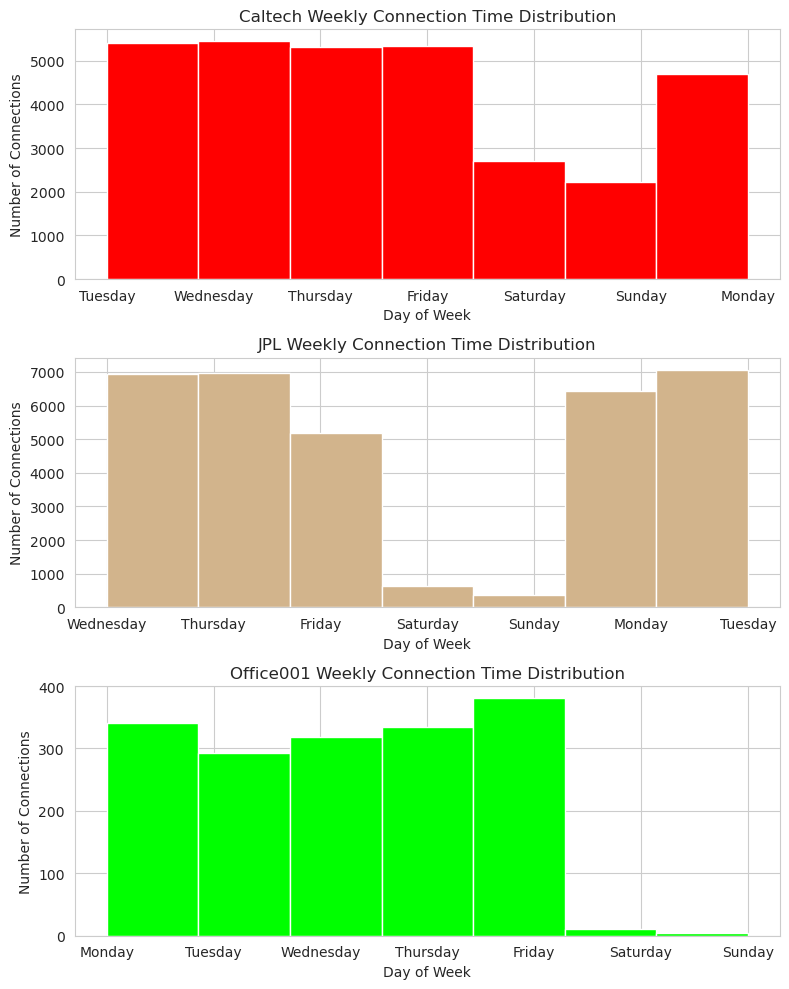

In [16]:
n_bins = 7
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Weekly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Day of Week")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Weekly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Weekly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Day of Week")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

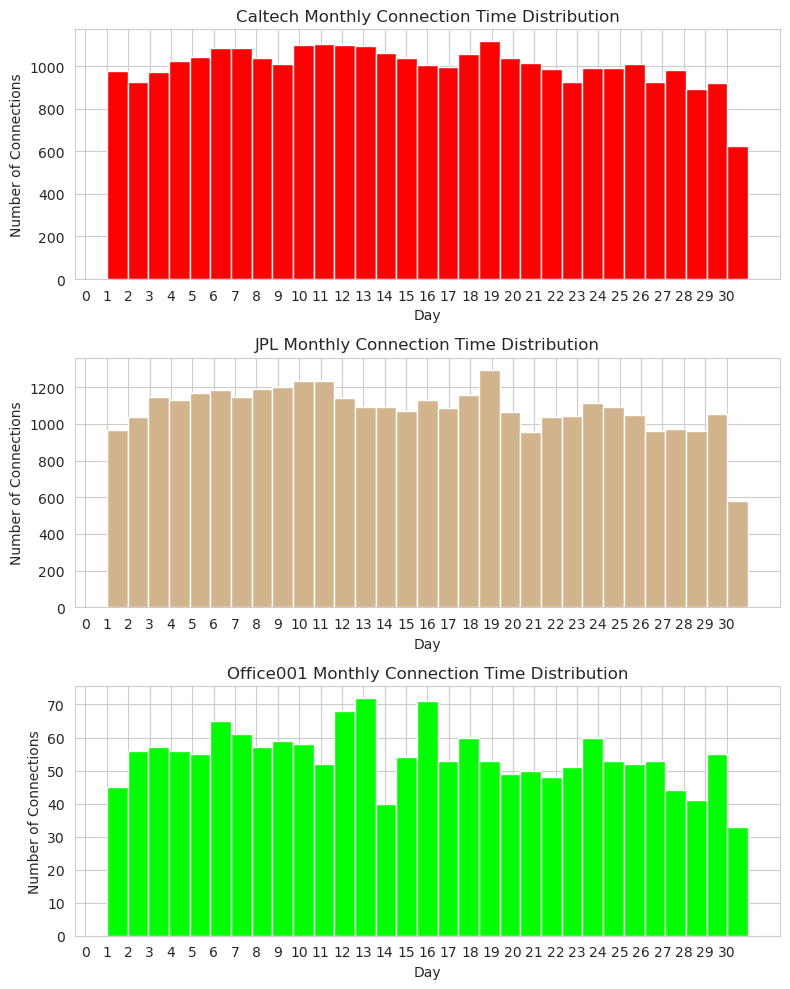

In [17]:
n_bins = 31
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTimeDay'], n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTimeDay'], n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTimeDay'], n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Monthly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Day")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Monthly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Day")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Monthly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Day")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

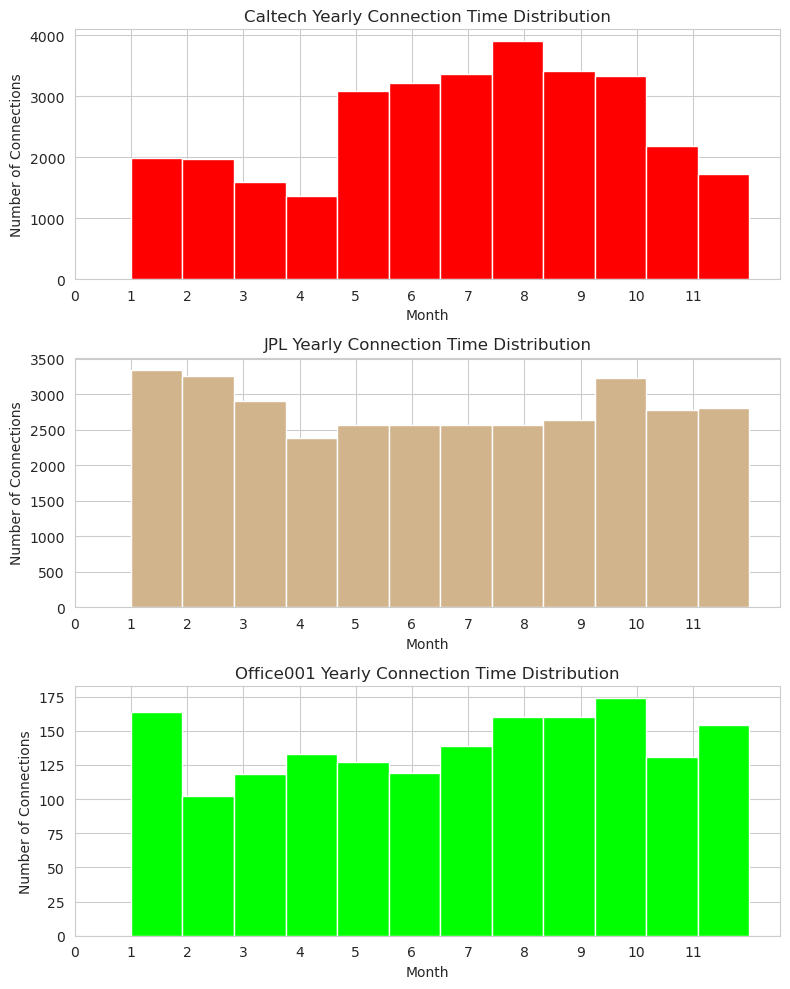

In [18]:
n_bins = 12
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Yearly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Yearly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Yearly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

In [19]:
len(df_ct) + len(df_jpl) + len(df_of)

66393

In [20]:
min(df_ct['connectionTime'].min(), df_jpl['connectionTime'].min(), df_of['connectionTime'].min())

Timestamp('2018-05-01 13:23:18+0000', tz='UTC')

In [21]:
max(df_ct['connectionTime'].max(), df_jpl['connectionTime'].max(), df_of['connectionTime'].max())

Timestamp('2021-09-13 06:31:02+0000', tz='UTC')

In [22]:
df_ct['connectionTime'].describe(datetime_is_numeric=True)

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [ ]:
df_jpl['connectionTime'].describe(datetime_is_numeric=True)

In [ ]:
df_of['connectionTime'].describe(datetime_is_numeric=True)

# Number of Charges per User

In [ ]:
df_ct.userID.value_counts()

In [ ]:
df_jpl.userID.value_counts()

In [ ]:
df_of.userID.value_counts()

In [ ]:
print((set(df_ct.userID)) & (set(df_jpl.userID)) & (set(df_of.userID)))

# Distribution of Charges by Location

In [ ]:
df_ct.groupby(df_ct.stationID).spaceID.value_counts()

In [ ]:
df_ct.groupby(df_ct.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

In [ ]:
df_jpl.groupby(df_jpl.stationID).spaceID.value_counts()

In [ ]:
df_jpl.groupby(df_jpl.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

In [ ]:
df_of.groupby(df_of.stationID).spaceID.value_counts()

In [ ]:
df_of.groupby(df_of.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

In [ ]:
df_of.shape
df_of.columns
df_of.head()

# Is_available
this function determines if the charger was active or not during a time period

In [ ]:
df_of

In [ ]:
# df_jpl.head()
tmp = df_of.copy()
tmp.set_index('connectionTime', inplace=True)
_filter = (tmp['spaceID'] == '02')
tmp = tmp[_filter].sort_index()
tmp = tmp.sort_index().loc['2019-03-20':'2019-04-01',:]
tmp

In [ ]:
y = pd.DataFrame(index=pd.date_range('2019-03-25','2019-04-02', inclusive='both', freq='h', tz=0),columns=['is_available','sessionID'])
y['is_available'] = 1

In [ ]:
# y['is_available']
start_ = tmp.index[0]
end_ = tmp.loc[start_,'disconnectTime'] 
session_ = tmp.loc[start_,'sessionID']
print(start_, end_)
pd.date_range(start_, end_, inclusive='both', freq='h', tz=0)
y.loc[start_:end_,['is_available','sessionID']] = 0, session_

In [ ]:
for i in range(len(tmp)):
    start_ = tmp.index[i]
    end_ = tmp.loc[start_,'disconnectTime'] 
    session_ = tmp.loc[start_,'sessionID']
    print(start_,'\t', end_,'\t', session_)
    y.loc[start_:end_,['is_available','sessionID']] = 0, session_
    # y.loc[pd.date_range(start_, end_, inclusive='both', freq='h', tz=0),['is_available','sessionID']] = 0, session_

In [ ]:
y[y['is_available'] == 0]
y


In [ ]:
plt.plot(y.index, y.is_available)
plt.title('spaceid 02 availability in late march, 2019')

In [ ]:
plt.title('Sessions at space 02')
plt.plot(y.index, y.is_available)
groups = y.groupby('sessionID')
for name, group in groups:
    plt.plot(group.index, group['is_available'], marker='o', linestyle='', markersize=8, label=name)

plt.xticks(rotation=75)
plt.legend()

# Now by spaces

# try spaceid as wide table 

In [ ]:
df_of.disconnectTime.max().date()

In [ ]:
tmp = df_of.copy()
tmp.set_index('connectionTime', inplace=True)
start_date = '2019-03-20'; end_date = '2021-09-14'
tmp = tmp.sort_index().loc[start_date:end_date,:]

In [ ]:
space_cols = tmp.spaceID.unique()
space_cols = (list(space_cols.astype('str')))

y = pd.DataFrame(index=pd.date_range(start_date,end_date, inclusive='both', freq='h', tz=0),columns=space_cols)
y[space_cols] = 1


In [ ]:
y.head()

In [ ]:
for i in range(len(tmp)):
    start_ = tmp.index[i]
    end_ = tmp.loc[start_,'disconnectTime'] 
    session_ = tmp.loc[start_,'sessionID']
    space_ = tmp.loc[start_,'spaceID']
    print(start_,'\t', end_,'\t', session_, '\t', space_)
    y.loc[start_:end_,space_] = 0

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
for space_ in sorted(space_cols):
    ax.plot(y.index, y[space_], label='space '+space_)
# ax.plot(y.index, y['03'])
ax.legend()


In [ ]:
y['percent_available'] = y.mean(axis=1)
y

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Charger availability in the office001')
plt.plot(y.index, y.percent_available)
plt.xlabel('date')
plt.xticks(rotation=80)
plt.ylabel('fraction of available spaces')
plt.ylim([0,1.1])

In [ ]:
y['percent_full'] = 1- y['percent_available']
plt.plot(y.index, y.percent_full, c='r')
plt.title('the fullness of the lot')
plt.ylim([0,1.05])

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
def holiday_processing(df):
    assert 'connectionTime' in df.columns
    cal = calendar()
    holidays = cal.holidays(start=df['connectionTime'].min().date(), end=df['connectionTime'].max().date())
    df['is_holiday'] = df['connectionTime'].isin(holidays)
    return df

# 1. Define key metrics
Total charges | 66393
What is the date range of charges | 5-1-2018 to 9-13-2021
How many unique cars are there?
What are the locations of charging
What is the distribution of charges over time
What is the distribution of charges over the hours of a day
What is the distribution of charges by vehicle
What is the distribution of charges over location
Is the rate of charging the same for a vehicle
Does the energy of daily charging change over time
Do the number of charges change over time
whats the probability of being available for each charger?
what's the multinomial distribution of charger availability for each location (ie whats the probaility 0 are full, 1 is full, 2 are full. ..etc) assume a bernouli random trial for each location